<a href="https://colab.research.google.com/github/juanosalvador/DB-SCAN-bd-delitos-de-Buffalo-2019/blob/principal/BD_Buffalo_a%C3%B1o_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Drive Folder in Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
## Librerías de cálculo, manipulación y tratamiento de datos
import pandas as pd
import numpy as np
# Estadísticas 
from scipy import stats
## Librerías de visualización de datos
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
## sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
path = "https://raw.githubusercontent.com/juanosalvador/Data_sets/main/Buffalo_2019.csv"

In [ ]:
## Importamos la base de datos del año 2019
#path = '/content/drive/MyDrive/003_BD_Longitudinales_Clusters/BD_BUFFALO/BD/Bd_Buffalo_2019.csv'
df = pd.read_csv(path)

In [ ]:
len(df)

18518

In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
latitude,42.890716,42.92175,42.899214,42.885483,42.936128
longitude,-78.876782,-78.826946,-78.877278,-78.879015,-78.839251
hour_of_day,3.0,17.0,2.0,11.0,20.0
day_of_week,Friday,Monday,Monday,Tuesday,Saturday
Month,8.0,11.0,9.0,2.0,8.0
parent_incident_type,Assault,Breaking & Entering,Robbery,Theft,Robbery
Council Districts,4.0,9.0,5.0,4.0,9.0


In [ ]:
df.head().T

,0,1,2,3,4
incident_id,"120,492,425","129,555,709","414,139,97","707,135,534","33,351,460"
case_number,12-2090105,12-2960630,14-1040066,15-0620303,10-1211184
incident_datetime,15-08-2019 12:00:00,25-11-2019 07:40:35,18-09-2019 10:00:00,22-02-2019 09:39:00,20-08-2019 12:00:00
incident_type_primary,ASSAULT,BURGLARY,ROBBERY,LARCENY/THEFT,ROBBERY
address_1,DELAWARE AV & W CHIPPEWA ST,200 Block SCHUELE AV,100 Block ALLEN ST,1 Block DELAWARE AV,RODNEY AV & FILLMORE AV
city,BUFFALO,BUFFALO,BUFFALO,BUFFALO,BUFFALO
state,NY,NY,NY,NY,NY
country,US,US,US,US,US
latitude,42.8907,42.9217,42.8992,42.8855,42.9361
longitude,-78.8768,-78.8269,-78.8773,-78.879,-78.8393


# <center><h1> Delitos Buffalo </h1></center>

In [ ]:
delitos = df.groupby(['parent_incident_type']).size().reset_index(name='counts')
delitos

,parent_incident_type,counts
0,Assault,4100
1,Breaking & Entering,3530
2,Homicide,52
3,Robbery,1175
4,Theft,8186
5,Theft of Vehicle,1475


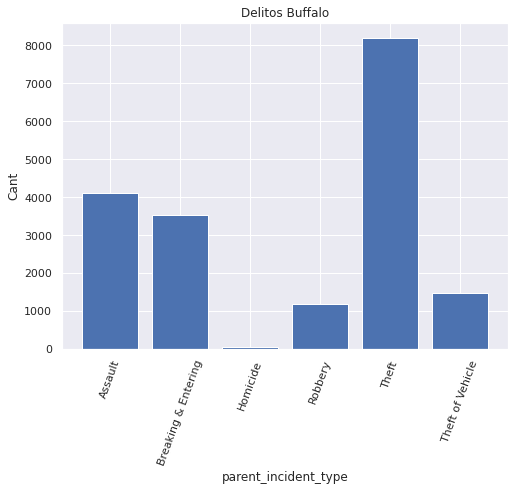

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(delitos['parent_incident_type'], delitos['counts'])
plt.xticks(rotation=70)
plt.title('Delitos Buffalo')
plt.xlabel('parent_incident_type')
plt.ylabel('Cant')
plt.show()

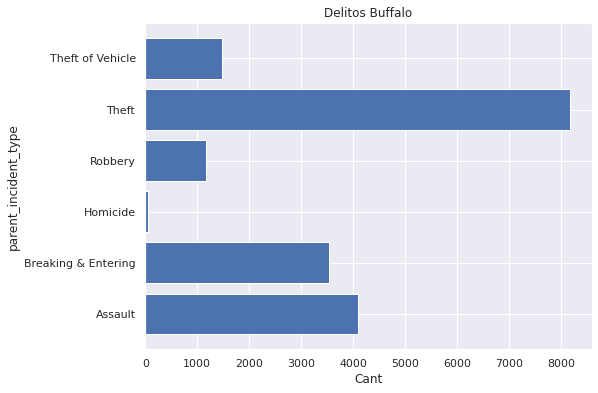

In [ ]:
plt.figure(figsize=(8,6))
plt.barh(delitos['parent_incident_type'], delitos['counts'])
plt.title('Delitos Buffalo')
plt.ylabel('parent_incident_type')
plt.xlabel('Cant')
plt.show()

In [ ]:
## Delitos por meses
tabla_año_delito = df[['Month','parent_incident_type']]
tabla_año_delito = tabla_año_delito.assign(count = 1)
# Pivot_table
pivot_meses_delitos = pd.pivot_table(tabla_año_delito, index ='Month', values = 'count', columns = 'parent_incident_type', fill_value=0, aggfunc=np.sum)
pivot_meses_delitos

parent_incident_type,Assault,Breaking & Entering,Homicide,Robbery,Theft,Theft of Vehicle
Month,,,,,,
1.0,278,244,4,74,574,107
2.0,250,209,3,77,489,87
3.0,306,244,4,89,559,118
4.0,293,269,2,67,617,77
5.0,371,316,4,121,739,145
6.0,377,326,7,112,759,151
7.0,429,363,7,128,789,154
8.0,409,335,5,114,832,128
9.0,371,297,2,98,661,118


In [ ]:
## Seleccionamos las columnas latitude y longitude y las transformamos a arrays de numpy
X = df.loc[:,['longitude','latitude']].to_numpy()
X

array([[-78.87678185,  42.8907157 ],
       [-78.82694553,  42.92174969],
       [-78.8772781 ,  42.89921406],
       ...,
       [-78.81687986,  42.92566696],
       [-78.81068986,  42.92784708],
       [-78.89265789,  42.92974028]])

In [ ]:
X_df = pd.DataFrame(X).reset_index().rename(columns = {'index': 'Indice', 0: 'longitude', 1:'latitude'})
X_df.head()

,Indice,longitude,latitude
0,0,-78.876782,42.890716
1,1,-78.826946,42.921750
2,2,-78.877278,42.899214
3,3,-78.879015,42.885483
4,4,-78.839251,42.936128


In [ ]:
# Escalamos los datos
X_scaled = StandardScaler().fit_transform(X)
len(X_scaled)

18518

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled).reset_index().rename(columns = {'index': 'Indice', 0: 'longitude', 1:'latitude'})
X_scaled_df.head()

,Indice,longitude,latitude
0,0,-0.868424,-0.737500
1,1,0.728032,0.365494
2,2,-0.884321,-0.435455
3,3,-0.939961,-0.923492
4,4,0.333840,0.876525


In [ ]:
stats.describe(X_scaled)

DescribeResult(nobs=18518, minmax=(array([-1.91764477, -3.0200633 ]), array([1.62171983, 1.85959908])), mean=array([-2.55711737e-13,  2.60312346e-14]), variance=array([1.000054, 1.000054]), skewness=array([-0.06040318, -0.42843306]), kurtosis=array([-1.34308029, -0.28991872]))

In [ ]:
stats.describe(X)

DescribeResult(nobs=18518, minmax=(array([-78.9095352 ,  42.82649315]), array([-78.79904743,  42.96378805])), mean=array([-78.84967239,  42.9114661 ]), variance=array([0.00097454, 0.00079169]), skewness=array([-0.06040318, -0.42843306]), kurtosis=array([-1.34308029, -0.28991872]))

In [ ]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Indice,18518.0,9258.500000,5345.830478,0.000000,4629.250000,9258.500000,13887.750000,18517.000000
longitude,18518.0,-78.849672,0.031218,-78.909535,-78.877442,-78.848414,-78.821223,-78.799047
latitude,18518.0,42.911466,0.028137,42.826493,42.893217,42.912658,42.934840,42.963788


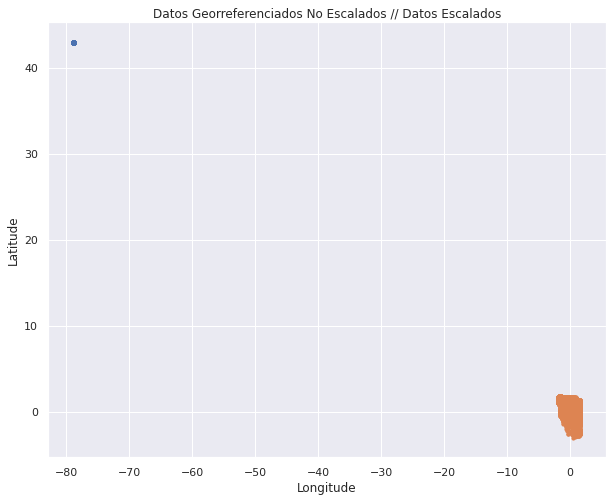

In [ ]:
# Graficamos
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],s=10)
plt.scatter(X_scaled[:,0],X_scaled[:,1],s=10, alpha=1)
plt.title('Datos Georreferenciados No Escalados // Datos Escalados')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# <center><h1> Ajustando el modelo con un $\epsilon$ cualquiera y MinPts arbitrario </h1></center>

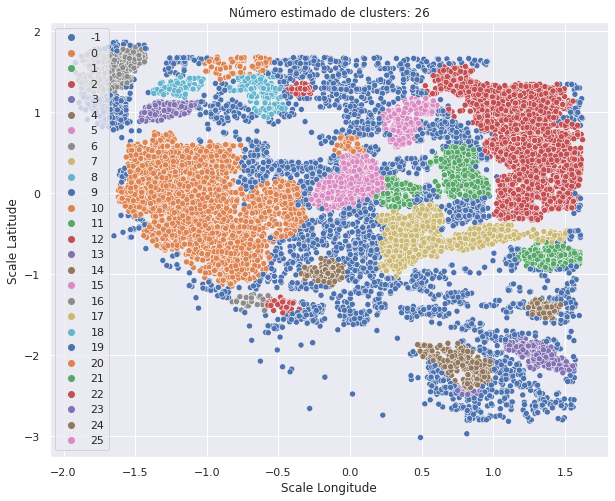

Estimated number of clusters: 26
Estimated number of noise points: 3829
Silhouette Coefficient: -0.037


In [ ]:
"""Datos Escalados"""
# Entrada de datos
eps = 0.09
min_samples = 60
#Ajunstando el modelo
db = DBSCAN(eps= eps, min_samples=min_samples).fit(X_scaled)
labels = db.labels_


####
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
#labels = db.labels_

unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#colors = np.random.rand(len(labels))
#cmap = plt.cm.get_cmap('jet')
### Visualización
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue=labels,  palette='deep')
#clusters = plt.scatter(X[:,0], X[:,1], s = 5, c = labels , cmap = 'Spectral_r') # 'Spectral_r'
#plt.legend(*clusters.legend_elements(),title='clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(labels,title='clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Número estimado de clusters: %d' % (len(np.unique(labels))-1))
plt.xlabel('Scale Longitude')
plt.ylabel('Scale Latitude')
plt.show()

## Metrica de desempeño: Coeficiente de Silhouette
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_ )
print('Estimated number of noise points: %d' % n_noise_ )
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, labels))

# <center><h1>Calculando el valor óptimo para epsilon ( $\epsilon$ ) mediante KNN Datos Escalados</h1></center>

<center>* Se utilizará como radio de vecindad ($\epsilon$) la distancia al vecino más cercano (primer vecino).</center>

 <center> * Minpoints = $\epsilon$ </center>

In [ ]:
from sklearn.neighbors import NearestNeighbors

## Algoritmo KNN

Radio ($\epsilon$) al vecino más cercano. k = 2

In [ ]:
def knn_min_distances(k_min,data):
  neigh = NearestNeighbors(n_neighbors= k_min, metric='euclidean')
  nbrs = neigh.fit(data)
  min_distances, indices = nbrs.kneighbors(data)
  ## Ordenamos las distancias
  sort_distances_min = np.sort(min_distances[:,1],axis=0)
  return sort_distances_min 


In [ ]:
X_scaled

array([[-0.86842401, -0.73749955],
       [ 0.72803207,  0.36549409],
       [-0.88432116, -0.43545524],
       ...,
       [ 1.05047581,  0.50471967],
       [ 1.24876617,  0.58220421],
       [-1.37699726,  0.64949135]])

In [ ]:
        """Algoritmo KNN al primer Vecino"""
k_min = 2## epsilon
# epsilon = 0.09 ## anterior
# epsilon seleccionado 2 
neigh = NearestNeighbors(n_neighbors= k_min, metric='euclidean')
nbrs = neigh.fit(X_scaled)
epsilon_X_scaled, indices_scaled = nbrs.kneighbors(X_scaled)

In [ ]:
#distances_min = knn_min_distances(2,X_scaled)

In [ ]:
## Distancia al vecino más cercano
#epsilon_X_scaled_knn = pd.DataFrame(epsilon_X_scaled[:,1]).rename(columns= {0: 'Min_dist'})
#epsilon_X_scaled_knn.head()

In [ ]:
          """ Df object escaled """
# Indices Escalados          
df_indices_scaled = pd.DataFrame(indices_scaled)
## Distancia al vecino más cercano
epsilon_X_scaled_knn = pd.DataFrame(epsilon_X_scaled[:,1]).rename(columns= {0: 'Min_dist_escaled'})
epsilon_X_scaled_knn.head()
## Indices  de la matriz de distancias obtenidas con el algoritmo KNN
df_indices_scaled.rename(columns = {0:'Punto', 1:'dist_primer_vecino'}, inplace = True)
## Combinamos la información
knn_min_dist_scaled_df = pd.concat([df_indices_scaled, epsilon_X_scaled_knn],1).reset_index().rename(columns = {'index':'indice_o'})
#knn_min_dist_scaled_df.head() ## merge con X_scaled_df

          """ Df object escaled """
# Indices Escalados          
df_indices_scaled = pd.DataFrame(indices_escaled)
## Distancia al vecino más cercano
epsilon_X_scaled_knn = pd.DataFrame(epsilon_X_scaled[:,1]).rename(columns= {0: 'Min_dist_escaled'})
epsilon_X_scaled_knn.head()
## Indices  de la matriz de distancias obtenidas con el algoritmo KNN
df_indices_scaled.rename(columns = {0:'Punto', 1:'dist_primer_vecino'}, inplace = True)
## Combinamos la información
knn_min_dist_scaled_df = pd.concat([df_indices_scaled, epsilon_X_scaled_knn],1).reset_index().rename(columns = {'index':'indice_o'})
#knn_min_dist_scaled_df.head() ## merge con X_scaled_df

In [ ]:
#knn_min_dist_scaled_df['Min_dist_escaled'].describe()

#<center> <h1> Knee Locator Datos Escalados</h1></center>
[Documentación](https://kneed.readthedocs.io/en/stable/parameters.html#s)




In [ ]:
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [ ]:
#knn_min_dist_scaled_df.columns

In [ ]:
## sort distance ascending
sort_distances_escaled = knn_min_dist_scaled_df.sort_values(['Min_dist_escaled'], ascending = True)
## numpy array
sort_distances_min_scaled = sort_distances_escaled[['indice_o','Min_dist_escaled']].to_numpy()


The value for the optimal epsilon is :  0.034


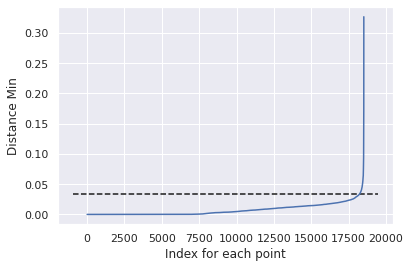

In [ ]:
## Calculando la epsilon por el método del codo para el primer vecino o distancia minima

# Definiemos Variables
index_point = range(1, len(sort_distances_min_scaled)+1)
distancias_minimas  = sort_distances_min_scaled[:,1]
# Aplicamos Kneelocator
kn = KneeLocator( index_point ,distancias_minimas,  curve='convex', direction='increasing', S=5, interp_method="interp1d")
###### El ajuste de la sensibilidad (S) fue de forma visual
#resultado de kneelocator
distancia = kn.knee
## Obtenemos el epsilon
epsilon = round(sort_distances_min_scaled[:,1][distancia],3)
print('The value for the optimal epsilon is : ', epsilon)

# Graficamos
import matplotlib.pyplot as plt
plt.xlabel('Index for each point')
plt.ylabel('Distance Min')
plt.plot(index_point, sort_distances_min_scaled[:,1])

# Marcamos epsilon
plt.hlines(epsilon, plt.xlim()[0], plt.xlim()[1], linestyles='dashed')
#plt.vlines(epsilon, plt.xlim()[1], plt.xlim()[0], linestyles='dashed')
plt.show()

# Métrica de Desempeño

In [ ]:
"""Métrica de Desempeño"""
sh=[]
for k in range(2,20):#el ultimo valor de cluster es un elemento por cluster
    db = DBSCAN(eps= epsilon, min_samples=k).fit(X_scaled)
    score=silhouette_score(X_scaled, db.labels_)
    sh.append(score)

In [ ]:
siliueta_coef = pd.DataFrame(list(zip(range(1,len(sh)+1), sh)),columns = ['Min Points','Silueta_coef'])
min_samples = sh.index(max(sh))+1
siliueta_coef.head()

,Min Points,Silueta_coef
0,1,-0.431582
1,2,-0.395104
2,3,-0.375274
3,4,-0.343761
4,5,-0.314658


[axes](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

silhouette máx:  -0.165


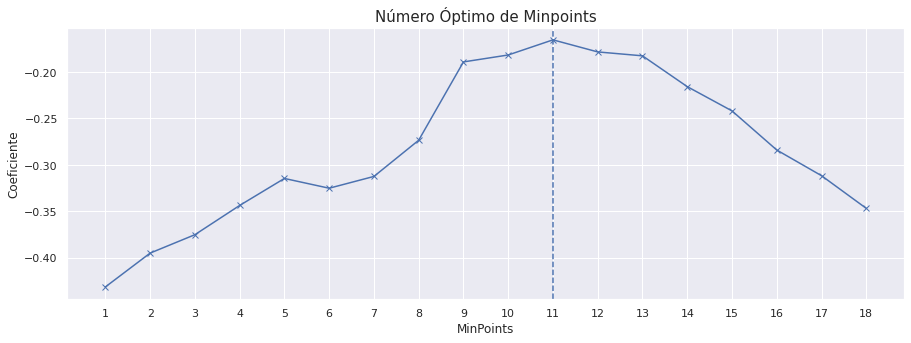

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
axes.plot(siliueta_coef['Min Points'], siliueta_coef['Silueta_coef'], 'bx-')
axes.set_xticks(siliueta_coef['Min Points'], minor=False)
axes.set_title('Número Óptimo de Minpoints', fontsize=15)
axes.set_ylabel('Coeficiente')
axes.set_xlabel('MinPoints')
axes.axvline(sh.index(max(sh))+1, ls = 'dashed')
print('silhouette máx: ', round(siliueta_coef['Silueta_coef'].max(),3) )
plt.show()


#<center><h1>DBSCAN Datos Escalados</h1></center>

  * Hiperparametros:

  $\epsilon$ = 0.034 <br>
  Minpoints = 11 


In [ ]:
print('epsilon: ', epsilon )
print('MinPoints: ', min_samples)

epsilon:  0.034
MinPoints:  11


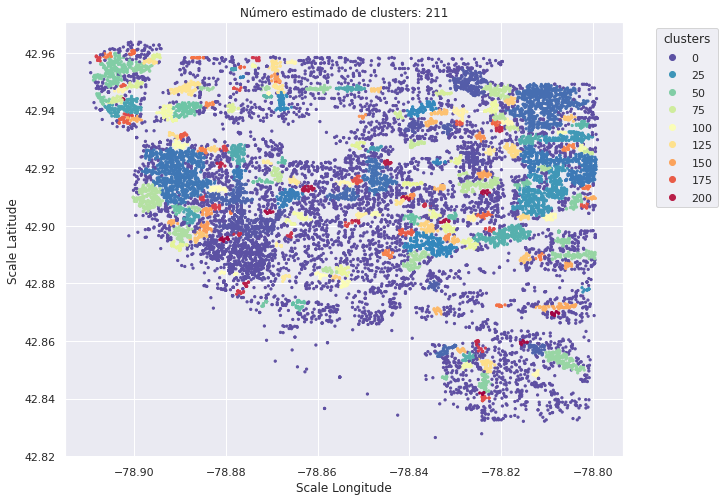

Estimated number of clusters: 211
Estimated number of noise points: 6059
Silhouette Coefficient: -0.165


In [ ]:
db = DBSCAN(eps= epsilon, min_samples=min_samples+1).fit(X_scaled)
labels = db.labels_



In [ ]:
df['labels_dbscan'] = labels

In [ ]:
#Informacion delitos cluster
## Delitos por cluster
tabla_cluster_delito_scaled = df[['labels_dbscan','parent_incident_type']]
tabla_cluster_delito_scaled = tabla_cluster_delito_scaled.assign(count = 1)
# Pivot_table
pivot_cluster_delitos_scaled = pd.pivot_table(tabla_cluster_delito_scaled, index ='labels_dbscan', values = 'count', columns = 'parent_incident_type', fill_value=0, aggfunc=np.sum)
pivot_cluster_delitos_scaled

parent_incident_type,Assault,Breaking & Entering,Homicide,Robbery,Theft,Theft of Vehicle
labels_dbscan,,,,,,
-1,1246,1255,22,334,2676,526
0,275,108,0,86,640,65
1,26,22,0,5,22,8
2,83,45,0,28,336,38
3,21,6,1,7,17,7
...,...,...,...,...,...,...
206,1,0,0,0,1,0
207,4,2,0,1,4,0
208,2,1,0,2,6,1


In [ ]:
from sklearn.utils import shuffle
X_scaled= shuffle(X_scaled, random_state=123)[:100]
X_scaled.shape

(100, 2)

In [ ]:
#  Distancia al ultimo vecino
sh=[]
ep=[]
from sklearn.metrics import silhouette_score
for k in range(2,20): 

    #print('vecinos: ', k)
    neigh = NearestNeighbors(n_neighbors= k+1, metric='euclidean')
    nbrs = neigh.fit(X_scaled)
    distances1, indices = nbrs.kneighbors(X_scaled)
    # sort
    distances1 = np.sort(distances1, axis=0)
    #print('Distancia Ordenada:' )
    #print( pd.DataFrame(distances1).head())
    #print('***')
    #print('Seleccion indice K: ', k)
    distances1 = distances1[:,k]
    #print('*******')
    #print(pd.DataFrame(distances1))
    distance_min=distances1
    
    #print('Calculando el codo para un k:', k)
    #print('*****')
    from kneed import KneeLocator
    kn = KneeLocator(range(1,len(distance_min)+1) ,distance_min,  curve='convex', direction='increasing', S = 3 ,interp_method="interp1d" )
    epsilon=  round(distance_min[kn.knee],3)
    ep.append(epsilon)
    db = DBSCAN(eps= epsilon, metric='euclidean', min_samples= k).fit(X_scaled)
    labels = db.labels_
    score= silhouette_score(X_scaled, db.labels_)
    sh.append(score)

ValueError: ignored

# <center><h1>Calculando el valor óptimo para epsilon ( $\epsilon$ ) mediante KNN Datos No Escalados</h1></center>

<center>* Se utilizará como radio de vecindad ($\epsilon$) la distancia al vecino más cercano (primer vecino).</center>

 <center> * Minpoints = $\epsilon$ </center>



In [ ]:
        """Algoritmo KNN al primer Vecino datos No escalados"""
#k_min = 2
#neigh = NearestNeighbors(n_neighbors= k_min, metric= 'euclidean')
#nbrs = neigh.fit(X)
#epsilon_X, indices_X =  nbrs.kneighbors(X)

#k_min = 2
sort_distances_min = knn_min_distances(2,X)

In [ ]:
## Ordenamos las distancias
#sort_distances_min = np.sort(epsilon_X[:,1],axis=0)

          """ Df object No escaled """
# Indices No Escalados          
df_indices_X = pd.DataFrame(indices_X)
## Distancia al vecino más cercano
epsilon_X_knn = pd.DataFrame(epsilon_X[:,1]).rename(columns= {0: 'Min_dist'})
epsilon_X_knn.head()


## Indices  de la matriz de distancias obtenidas con el algoritmo KNN
df_indices_X.rename(columns = {0:'Punto', 1:'dist_primer_vecino'}, inplace = True)

## Combinamos la información
knn_min_dist_df = pd.concat([df_indices_X, epsilon_X_knn],1).reset_index().rename(columns = {'index':'indice_o'})
#knn_min_dist_df.head()

In [ ]:
#knn_min_dist_scaled_df.head()

In [ ]:
#knn_min_dist_df['Key'] =  knn_min_dist_df['Punto'].astype(str) + '_'+ knn_min_dist_df['dist_primer_vecino'].astype(str)
#knn_min_dist_scaled_df['Key'] = knn_min_dist_scaled_df['Punto'].astype(str) + '_' + knn_min_dist_scaled_df['dist_primer_vecino'].astype(str)

#len(knn_min_dist_df['Key'].unique())

#pd.merge(knn_min_dist_df,knn_min_dist_scaled_df, how = 'inner' , on = 'Key')

In [ ]:
"""Merge BD""" 
#merge_knn = pd.merge(knn_min_dist_df, knn_min_dist_scaled_df, how = 'inner', on = 'indice_o')
#merge_knn.head()

In [ ]:
## sort distance ascending 
#sort_distances = knn_min_dist_df.sort_values(['Min_dist'], ascending = True)
## numpy array
#sort_distances_min= sort_distances[['indice_o','Min_dist']].to_numpy()

distances1 = distances1[:,1] ## Escogemos al primer vecino
distances1 = np.sort(distances1, axis=0) # Ordenamos de menor a mayor

plt.plot(distances1)
plt.title("Elbow method")
plt.xlabel('Index for each point')
plt.ylabel('Average Distance')
plt.show()

## Knee Locator
[Documentación](https://kneed.readthedocs.io/en/stable/parameters.html#s)

## Calculando la epsilon por el método del codo para el primer vecino o distancia minima

In [ ]:
def knee_locator(sort_distances_min):

  ## Calculando la epsilon por el método del codo para el primer vecino o distancia minima

  # Definiemos Variables 
  index_point = range(1, len(sort_distances_min)+1)
  distancias_minimas  = sort_distances_min.copy()
  # Aplicamos Kneelocator
  kn = KneeLocator( index_point ,distancias_minimas,  curve='convex', direction='increasing', S=5, interp_method="interp1d")
  ###### El ajuste de la sensibilidad (S) fue de forma visual
  #resultado de kneelocator
  distancia = kn.knee
  ## Obtenemos el epsilon
  epsilon = round(sort_distances_min[distancia],3)
  # Graficamos
  import matplotlib.pyplot as plt
  plt.xlabel('Index for each point')
  plt.ylabel('Distance Min')
  plt.plot(index_point, sort_distances_min)

  # Marcamos epsilon
  plt.hlines(epsilon, plt.xlim()[0], plt.xlim()[1], linestyles='dashed')
  #plt.vlines(epsilon, plt.xlim()[1], plt.xlim()[0], linestyles='dashed')
  plt.show()
  return epsilon, print('The value for the optimal epsilon is : ', epsilon)

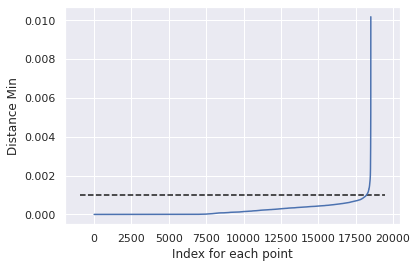

The value for the optimal epsilon is :  0.001


In [ ]:
epsi = knee_locator(sort_distances_min)

## Calculando la epsilon por el método del codo para el primer vecino o distancia minima

# Definiemos Variables 
index_point = range(1, len(sort_distances_min)+1)
distancias_minimas  = sort_distances_min
# Aplicamos Kneelocator
kn = KneeLocator( index_point ,distancias_minimas,  curve='convex', direction='increasing', S=5, interp_method="interp1d")
###### El ajuste de la sensibilidad (S) fue de forma visual
#resultado de kneelocator
distancia = kn.knee
## Obtenemos el epsilon
epsilon = round(sort_distances_min[distancia],3)
print('The value for the optimal epsilon is : ', epsilon)

# Graficamos
import matplotlib.pyplot as plt
plt.xlabel('Index for each point')
plt.ylabel('Distance Min')
plt.plot(index_point, sort_distances_min)

# Marcamos epsilon
plt.hlines(epsilon, plt.xlim()[0], plt.xlim()[1], linestyles='dashed')
#plt.vlines(epsilon, plt.xlim()[1], plt.xlim()[0], linestyles='dashed')
plt.show()

# Metrica de Desempeño

In [ ]:
epsilon = epsi[0]
epsilon

0.001

In [ ]:
"""Métrica de Desempeño"""
sh=[]
for k in range(2,20):#el ultimo valor de cluster es un elemento por cluster
    db = DBSCAN(eps= epsilon, min_samples=k).fit(X)
    score=silhouette_score(X, db.labels_)
    sh.append(score)

In [ ]:
siliueta_coef = pd.DataFrame(list(zip(range(1,len(sh)+1), sh)),columns = ['Min Points','Silueta_coef'])
min_samples = sh.index(max(sh))+1
siliueta_coef.head()

,Min Points,Silueta_coef
0,1,-0.390447
1,2,-0.345018
2,3,-0.328477
3,4,-0.286205
4,5,-0.281556


silhouette máx:  -0.149


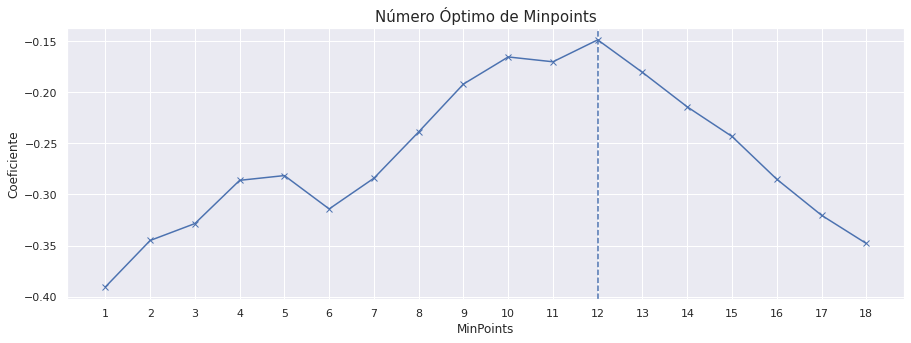

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
axes.plot(siliueta_coef['Min Points'], siliueta_coef['Silueta_coef'], 'bx-')
axes.set_xticks(siliueta_coef['Min Points'], minor=False)
axes.set_title('Número Óptimo de Minpoints', fontsize=15)
axes.set_ylabel('Coeficiente')
axes.set_xlabel('MinPoints')
axes.axvline(sh.index(max(sh))+1, ls = 'dashed')
print('silhouette máx: ', round(siliueta_coef['Silueta_coef'].max(),3) )
plt.show()


#<center><h1>DBSCAN Datos Escalados</h1></center>

  * Hiperparametros:

  $\epsilon$ = 0.001 <br>
  Minpoints = 12


In [ ]:
print('epsilon: ', epsilon )
print('MinPoints: ', min_samples)

epsilon:  0.001
MinPoints:  12


In [ ]:
min_samples

12

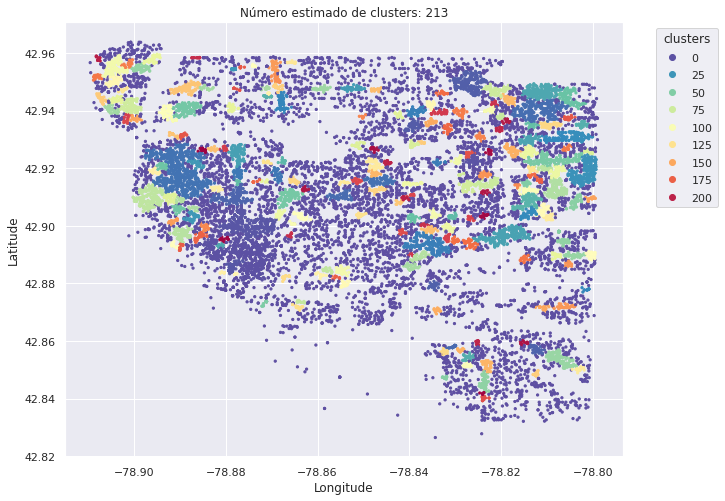

Estimated number of clusters: 213
Estimated number of noise points: 7067
Silhouette Coefficient: -0.149


In [ ]:
db = DBSCAN(eps= epsilon, min_samples=min_samples+1).fit(X)
labels = db.labels_

unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#colors = np.random.rand(len(labels))
#cmap = plt.cm.get_cmap('jet')
### Visualización
fig = plt.figure(figsize=(10, 8))
#sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1],  hue=labels ,palette='deep') #  ,
clusters = plt.scatter(X[:,0], X[:,1], s = 5, c = labels , cmap = 'Spectral_r') # 'Spectral_r'
plt.legend(*clusters.legend_elements(),title='clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.legend(labels,title='clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Número estimado de clusters: %d' % (len(np.unique(labels))-1))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Metrica de desempeño: Coeficiente de Silhouette
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_ )
print('Estimated number of noise points: %d' % n_noise_ )
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

In [ ]:
df['labels_escalados'] = labels

In [ ]:
#df.head(10)

In [ ]:
#Informacion delitos cluster
## Delitos por cluster
tabla_cluster_delito = df[['labels_escalados','parent_incident_type']]
tabla_cluster_delito = tabla_cluster_delito.assign(count = 1)
# Pivot_table
pivot_cluster_delitos = pd.pivot_table(tabla_cluster_delito, index ='labels_escalados', values = 'count', columns = 'parent_incident_type', fill_value=0, aggfunc=np.sum)
pivot_cluster_delitos

parent_incident_type,Assault,Breaking & Entering,Homicide,Robbery,Theft,Theft of Vehicle
labels_escalados,,,,,,
-1,1471,1486,23,394,3086,607
0,224,75,0,76,510,52
1,15,13,0,2,17,5
2,72,42,0,25,311,34
3,41,26,0,9,109,8
...,...,...,...,...,...,...
208,6,3,0,0,4,0
209,4,0,0,2,6,1
210,2,1,0,2,7,1


# FOLIUM

In [ ]:
import matplotlib.pyplot as plt
import folium
from matplotlib import cm

In [ ]:
from sklearn.utils import shuffle
df= shuffle(df, random_state=123)[:10000]

In [ ]:
df.info()

In [ ]:
#df['labels_dbscan'] = df['labels_dbscan'] +1 
#df['labels_dbscan']

In [ ]:

#coordenadas Buffalo
latitud =  42.88645
longitud = -78.87837

# creamos el mapa de Buffalo
buffalo_map = folium.Map(location=[latitud, longitud], zoom_start=13 )

for lat, lng, label, cluster in zip(df.latitude, df.longitude, df.parent_incident_type, df.labels_escalados ):
  folium.CircleMarker(
      
      # sólo utilizamos marcadores circulares
      [lat, lng],
      radius=3, 
      color=False,
      fill_color = 'RdYlBu',
      popup=label, # agregamos la categoría al marcador circular, de modo emergente
      fill_opacity=0.6
    ).add_to(buffalo_map)

buffalo_map